In [1]:
import warnings

import keras.layers

warnings.filterwarnings('ignore')
# import cv2
from keras.models import load_model
import tensorflow as tf
from keras import optimizers
import segmentation_models as sm
from commons import *

import metric
from architecture import create_model, create_callbacks


BACKUP_MODEL_PATH = "./../Models/backup.h5"
BACKUP_HISTORY_PATH = "./../Models/backup.csv"
seed = 56

IMAGE_HEIGHT = IMAGE_WIDTH = 256 * 2 # * 2

EPOCHS = 100
LEARNING_RATE = 0.001
BATCH_SIZE = 4

ROOT = "./../Data/all-cities/"
TRAIN_DIR = "_Train512/"
USE_AUGMENTATION = True

Segmentation Models: using `keras` framework.


In [2]:
opt = keras.optimizers.Adam(LEARNING_RATE)
callbacks = create_callbacks(BACKUP_MODEL_PATH, BACKUP_HISTORY_PATH)

train_gen, val_gen = train_val_generator(IMAGE_WIDTH, IMAGE_HEIGHT, ROOT, TRAIN_DIR, BATCH_SIZE, seed,
                                         use_aug=USE_AUGMENTATION)

Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.


In [5]:
# """Load Model backup to resume training after crash or break or for pretraining"""
# model = load_model(BACKUP_MODEL_PATH, custom_objects={"dice_loss" : sm.losses.DiceLoss(), "iou_score": sm.metrics.IOUScore(threshold=0.5), "f1-score":sm.metrics.FScore()})

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5e-06>


In [4]:
PRETRAINED_MODEL_PATH = "./../Models/Roads/road_mapper_scratch_x512_Combined_Train18598_Val1617_Test5079_No-Aug_IoU6065_f7516.h5"

model = load_model(PRETRAINED_MODEL_PATH, custom_objects={"dice_loss" : sm.losses.DiceLoss(), "iou_score": sm.metrics.IOUScore(threshold=0.1), "f1-score":sm.metrics.FScore(), "quality":metric.quality()})

first_half = ["conv2d_01","conv2d_02","conv2d_03","conv2d_04","conv2d_05","conv2d_06","conv2d_07","conv2d_08", "conv2d_09"]
second_half = ["conv2d_010","conv2d_011","conv2d_012","conv2d_013","conv2d_014","conv2d_015","conv2d_016","conv2d_017", "conv2d_018"]

for layer in model.layers:
      if layer.name in second_half:
            layer.trainable = False
      if layer.name in ["dropout", "dropout_1", "dropout_2", "dropout_3", "dropout_4", "dropout_5", "dropout_6", "dropout_7", "dropout_8"]:
            layer.rate = 2*layer.rate

#print(model.layers)
met = model.metrics[1:] #+ [metric.quality()] # [1:] to not include loss

model.compile(optimizer=opt, loss=model.loss, metrics= met, run_eagerly=True)

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

history = model.fit(train_gen.data,  validation_data=val_gen.data, steps_per_epoch=train_gen.samplesPerBatch, validation_steps=val_gen.samplesPerBatch, callbacks=list(callbacks), epochs=EPOCHS, verbose=1) #,

Num GPUs Available:  1
Epoch 1/100
 42/901 [>.............................] - ETA: 3:22 - loss: 0.8345 - iou_score: 0.0918 - f1-score: 0.1655

KeyboardInterrupt: 

In [7]:
model_path = "./../Models/Binary/512/bike_mapper_pre-train-freeze-right-lr1e-4_double-dropout_Train3607_Val313_Test980_No-Aug.h5"
save_model(model, model_path=model_path, csv_history_path_to_delete=BACKUP_HISTORY_PATH)
plot_history(history, model_path)

Time of saving model: 2022-10-26 10:53:53.951043


vbunet l
vbunet r
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Num GPUs Available:  1
Epoch 1/6
1935/1935 [==============================] - ETA: 0s - loss: 0.8692 - iou_score: 0.0711 - f1-score: 0.1308 - quality: 0.2050
Epoch 1: val_loss improved from inf to 0.85240, saving model to ./../Models\backup.h5
1935/1935 [==============================] - 1084s 560ms/step - loss: 0.8692 - iou_score: 0.0711 - f1-score: 0.1308 - quality: 0.2050 - val_loss: 0.8524 - val_iou_score: 0.0854 - val_f1-score: 0.1476 - val_quality: 0.2383 - lr: 0.0010
Epoch 2/6
1935/1935 [==============================] - ETA: 0s - loss: 0.8442 - iou_score: 0.0861 - f1-score: 0.1558 - quality: 0.2345
Epoch 2: val_loss improved from 0.85240 to 0.82917, saving model to ./../Model

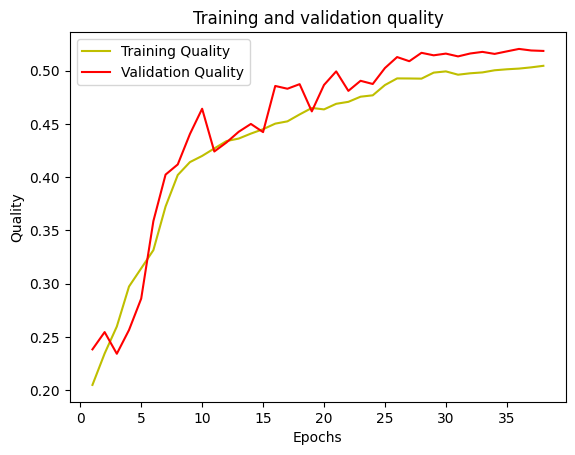

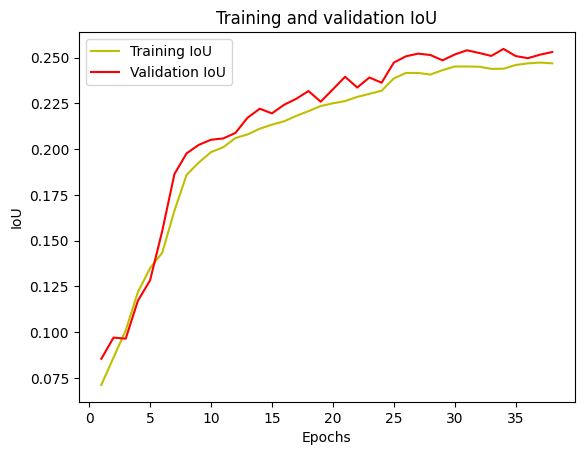

dbunet l
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Num GPUs Available:  1
Epoch 1/6
1935/1935 [==============================] - ETA: 0s - loss: 0.7979 - iou_score: 0.1161 - f1-score: 0.2021 - quality: 0.2631
Epoch 1: val_loss improved from inf to 0.79284, saving model to ./../Models\backup.h5
1935/1935 [==============================] - 1106s 571ms/step - loss: 0.7979 - iou_score: 0.1161 - f1-score: 0.2021 - quality: 0.2631 - val_loss: 0.7928 - val_iou_score: 0.1244 - val_f1-score: 0.2072 - val_quality: 0.2395 - lr: 0.0010
Epoch 2/6
1935/1935 [==============================] - ETA: 0s - loss: 0.7346 - iou_score: 0.1581 - f1-score: 0.2655 - quality: 0.3430
Epoch 2: val_loss improved from 0.79284 to 0.70627, saving model to ./../Models\backup.

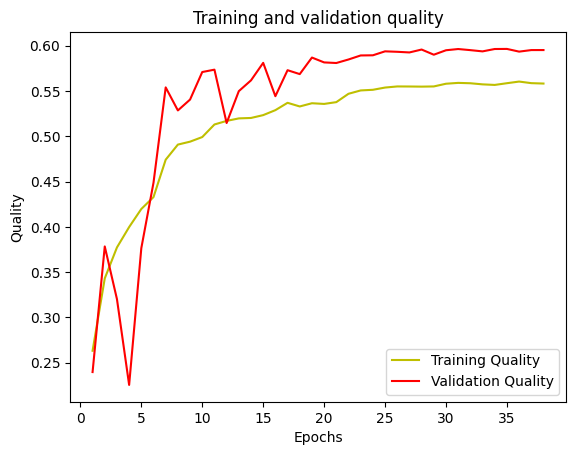

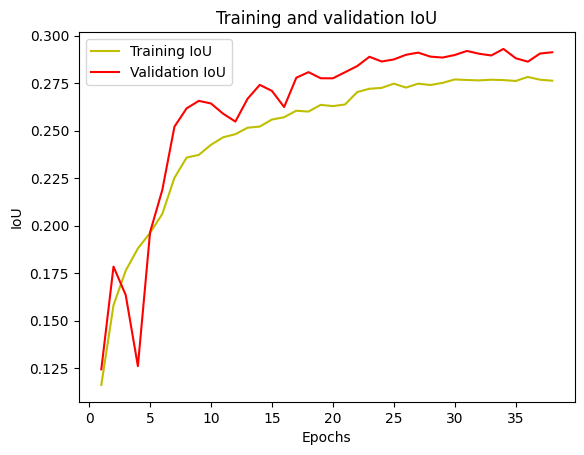

dbunet r
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Num GPUs Available:  1
Epoch 1/6
1935/1935 [==============================] - ETA: 0s - loss: 0.7893 - iou_score: 0.1219 - f1-score: 0.2107 - quality: 0.2709
Epoch 1: val_loss improved from inf to 0.73726, saving model to ./../Models\backup.h5
1935/1935 [==============================] - 1124s 581ms/step - loss: 0.7893 - iou_score: 0.1219 - f1-score: 0.2107 - quality: 0.2709 - val_loss: 0.7373 - val_iou_score: 0.1555 - val_f1-score: 0.2627 - val_quality: 0.3483 - lr: 0.0010
Epoch 2/6
1935/1935 [==============================] - ETA: 0s - loss: 0.7272 - iou_score: 0.1630 - f1-score: 0.2729 - quality: 0.3530
Epoch 2: val_loss improved from 0.73726 to 0.69694, saving model to ./../Models\backup.

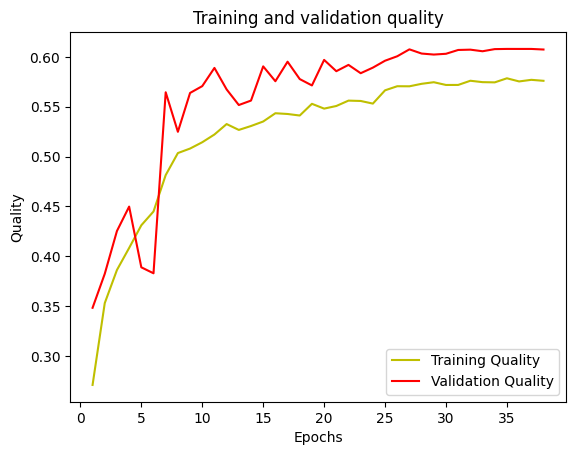

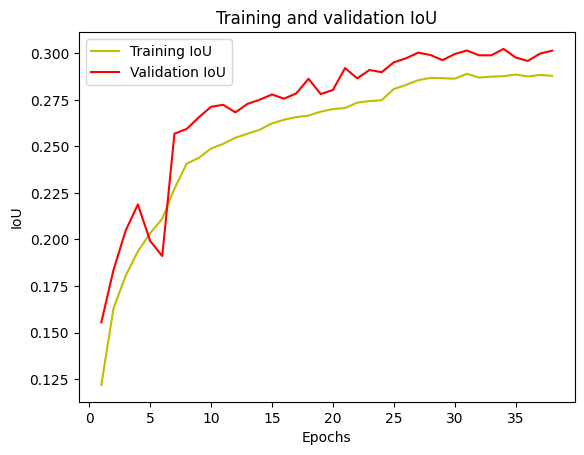

rbunet l
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Num GPUs Available:  1
Epoch 1/6
1935/1935 [==============================] - ETA: 0s - loss: 0.7911 - iou_score: 0.1205 - f1-score: 0.2089 - quality: 0.2724
Epoch 1: val_loss improved from inf to 0.86608, saving model to ./../Models\backup.h5
1935/1935 [==============================] - 770s 397ms/step - loss: 0.7911 - iou_score: 0.1205 - f1-score: 0.2089 - quality: 0.2724 - val_loss: 0.8661 - val_iou_score: 0.0741 - val_f1-score: 0.1339 - val_quality: 0.1796 - lr: 0.0010
Epoch 2/6
1935/1935 [==============================] - ETA: 0s - loss: 0.7384 - iou_score: 0.1551 - f1-score: 0.2617 - quality: 0.3407
Epoch 2: val_loss improved from 0.86608 to 0.70963, saving model to ./../Models\backup.h

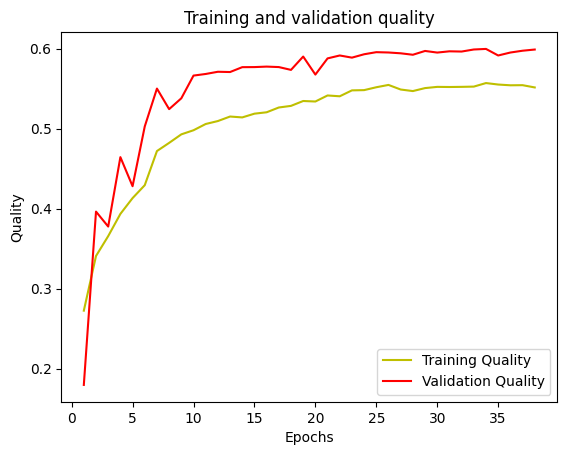

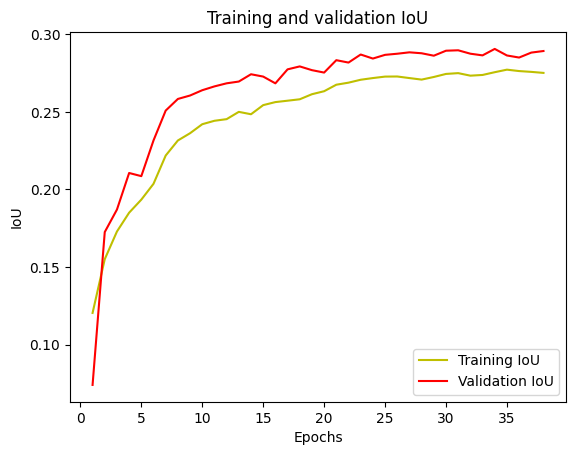

rbunet r
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Found 8410 files belonging to 1 classes.
Using 7738 files for training.
Found 8410 files belonging to 1 classes.
Using 672 files for validation.
Num GPUs Available:  1
Epoch 1/6
1935/1935 [==============================] - ETA: 0s - loss: 0.7818 - iou_score: 0.1266 - f1-score: 0.2182 - quality: 0.2819
Epoch 1: val_loss improved from inf to 0.74291, saving model to ./../Models\backup.h5
1935/1935 [==============================] - 779s 402ms/step - loss: 0.7818 - iou_score: 0.1266 - f1-score: 0.2182 - quality: 0.2819 - val_loss: 0.7429 - val_iou_score: 0.1522 - val_f1-score: 0.2571 - val_quality: 0.3412 - lr: 0.0010
Epoch 2/6
1935/1935 [==============================] - ETA: 0s - loss: 0.7284 - iou_score: 0.1622 - f1-score: 0.2716 - quality: 0.3521
Epoch 2: val_loss improved from 0.74291 to 0.69519, saving model to ./../Models\backup.h

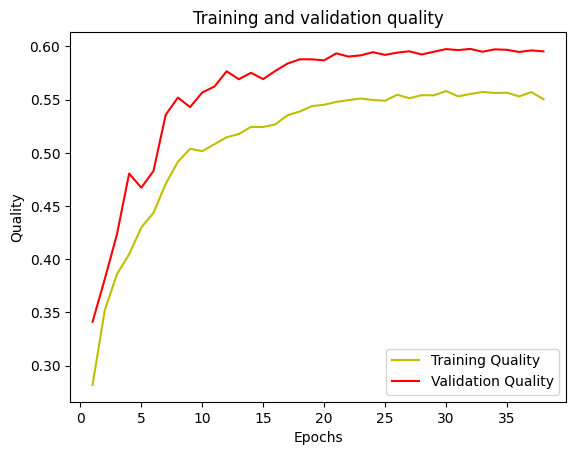

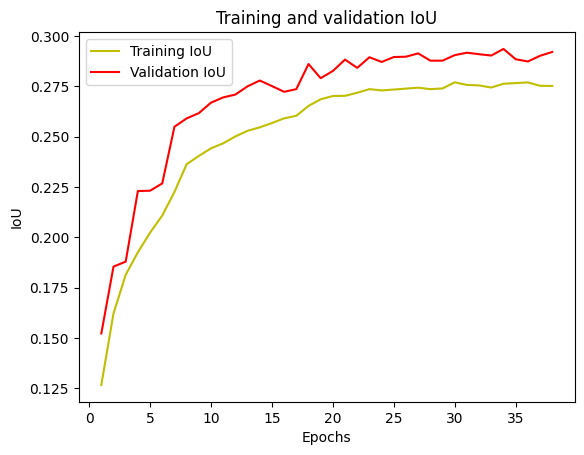

In [3]:
#PRETRAINED_MODEL_PATH = "./../Models/Roads/triple-param/road_mapper_scratch_Combined_Aug_IoU6075_q8080.h5"
paths = [
    #("./../Models/Roads/backbones/" + "road_mapper_pre-train-scratch-efficientnetb2_Aug_IoU6255_q8678.h5", "efficientnetb2"),
    ("./../Models/Roads/backbones/" +"road_mapper_pre-train-scratch-vgg16_Aug_IoU6426_q8564.h5", "vbunet"),
    ("./../Models/Roads/backbones/" +"road_mapper_pre-train-scratch-densenet121_Aug_IoU6256_q8446.h5", "dbunet"),
    ("./../Models/Roads/backbones/" +"road_mapper_pre-train-scratch-resnet34_Aug_IoU6145_q8386.h5", "rbunet"),
]

first_half = (["conv2d_01","conv2d_02","conv2d_03","conv2d_04","conv2d_05","conv2d_06","conv2d_07","conv2d_08", "conv2d_09"], "l")
second_half = (["conv2d_010","conv2d_011","conv2d_012","conv2d_013","conv2d_014","conv2d_015","conv2d_016","conv2d_017", "conv2d_018"], "r")

halves = [first_half, second_half]

for m in paths:
    PRETRAINED_MODEL_PATH = m[0]
    for half in halves:

          print(m[1], half[1])
          if m[1] == 'vbunet' and half[1] == 'l':
              continue
          model_path = "./../Models/color-aug/" + m[1] + "-" + half[1] + "_Aug.h5"


          train_gen, val_gen = train_val_generator(IMAGE_WIDTH, IMAGE_HEIGHT, ROOT, TRAIN_DIR, BATCH_SIZE, seed,
                                             use_aug=USE_AUGMENTATION)

          # define model
          model: keras.Model = load_model(PRETRAINED_MODEL_PATH, custom_objects={"dice_loss" : sm.losses.DiceLoss(), "iou_score": sm.metrics.IOUScore(threshold=0.1), "f1-score":sm.metrics.FScore(), "quality":metric.quality()})

          nb_train_false = 0
          nb_layers = len(model.layers)
          layers = model.layers if half[1] == "freeze-left" else model.layers[::-1]
          for i, layer in enumerate(layers):
              if "decoder_stage0" in layer.name and half[1] == "l":
                  break
              elif "decoder_stage0_upsampling" in layer.name and half[1] == "r":
                  break

              if isinstance(layer, keras.layers.Conv2D) or isinstance(layer, keras.layers.DepthwiseConv2D):
                  layer.trainable = False
                  nb_train_false += 1

                # if layer.name in ["dropout", "dropout_1", "dropout_2", "dropout_3", "dropout_4", "dropout_5", "dropout_6", "dropout_7", "dropout_8"]:
                #       layer.rate = 2*layer.rate
          if nb_train_false < 5:
              print("could only freeze", nb_train_false, "layers")
              raise Exception

          # Open the file
          with open(model_path[:-3] + "__summary.txt",'w') as fh:
              # Pass the file handle in as a lambda function to make it callable
              model.summary(print_fn=lambda x: fh.write(x + '\n'))
              fh.write("number of frozen Conv2D and DepthwiseConv2D layers" + str(nb_train_false) + "\n")


          opt = keras.optimizers.Adam(LEARNING_RATE)
          callbacks = create_callbacks(BACKUP_MODEL_PATH, BACKUP_HISTORY_PATH)

          met = model.metrics[1:] #+ [metric.quality()] # [1:] to not include loss

          model.compile(optimizer=opt, loss=model.loss, metrics= met, run_eagerly=True)

          print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

          history1 = model.fit(train_gen.data,  validation_data=val_gen.data, callbacks=list(callbacks), epochs=6, verbose=1)

          for layer in model.layers:
                layer.trainable = True


          opt = model.optimizer
          opt.lr = LEARNING_RATE / 10

          model.compile(
            optimizer=opt,
            loss=sm.losses.DiceLoss(),
            metrics=[sm.metrics.IOUScore(threshold=0.1), sm.metrics.FScore(), metric.quality()], run_eagerly=True
          )

          history = model.fit(train_gen.data,  validation_data=val_gen.data, callbacks=list(callbacks), epochs=EPOCHS, verbose=1, initial_epoch=6) #,

          keys = ['quality', 'iou_score', 'val_iou_score', 'val_quality']
          for key in keys:
                history.history[key] = history1.history[key] + history.history[key]

          save_model(model, model_path=model_path, csv_history_path_to_delete=BACKUP_HISTORY_PATH)
          plot_history(history, model_path)


In [ ]:
import os
os.system("shutdown /s /t 5")